### Case Numbers Can be Misleading to Determine Lockdown Measures

<u> High-Level Line of Argument </u>

A) Case Numbers are not always predictive for New ICU Admissions.
Hence, low case numbers shall not automatically imply less lockdown measures.
Also, high case numbers are not necessarily associated with high ICU admission numbers. Thus strong restrictions might not be justified.
These observations can partly be explained by the testing strategy. 

$\rightarrow$ Take into account the Tests per Case ratio (TpC) to estimate new ICU admissions. Low TpC indicates higher severity of the pandemic situation (for constant case numbers). Hence, Case Numbers should be weight inversely proportional to TpC.

B) Hospital Capacities lag behind the case numbers. Especially after a wave, lower case numbers should not lead to loosening of restrictions, if the ICUs have low capacities.

$\rightarrow$ Account for Current Capacity of ICUs before loosening restrictions after a wave.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load data [30Mb!]
full_data = pd.read_csv('owid-covid-data.csv')
# docu at: https://github.com/owid/covid-19-data/tree/master/public/data
# 100k rows, 60 cols

In [4]:
# Plot ICU and New Cases (7 day average) along time

# Extract Relevant Columns and Group By Country
cases_icu_grouped = full_data[['location',  'date', 'new_cases_smoothed_per_million', 'weekly_icu_admissions_per_million', 'icu_patients_per_million']].groupby('location')

In [6]:
# Get names of locations/ countries for which icu data is available
icu_admissions_countries = []
icu_countries = []

for location, group in cases_icu_grouped:
    if not group['weekly_icu_admissions_per_million'].isnull().values.all():
        icu_admissions_countries.append(location)
    if not group['icu_patients_per_million'].isnull().values.all():
        icu_countries.append(location)
        
print('Weekly ICU-Admissions available for: \n', icu_admissions_countries, '\n')
print('ICU-Patients (on a given day) available for: \n', icu_countries)

Weekly ICU-Admissions available for: 
 ['Cyprus', 'Czechia', 'Estonia', 'France', 'Greece', 'Ireland', 'Israel', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Slovenia', 'Spain', 'Sweden'] 

ICU-Patients (on a given day) available for: 
 ['Algeria', 'Austria', 'Belgium', 'Bulgaria', 'Canada', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland', 'Israel', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Romania', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom', 'United States']


<ipython-input-118-dadf37e638e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-118-dadf37e638e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-118-dadf37e638e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-118-dadf37e638e6>:5: SettingWithCopyWarn

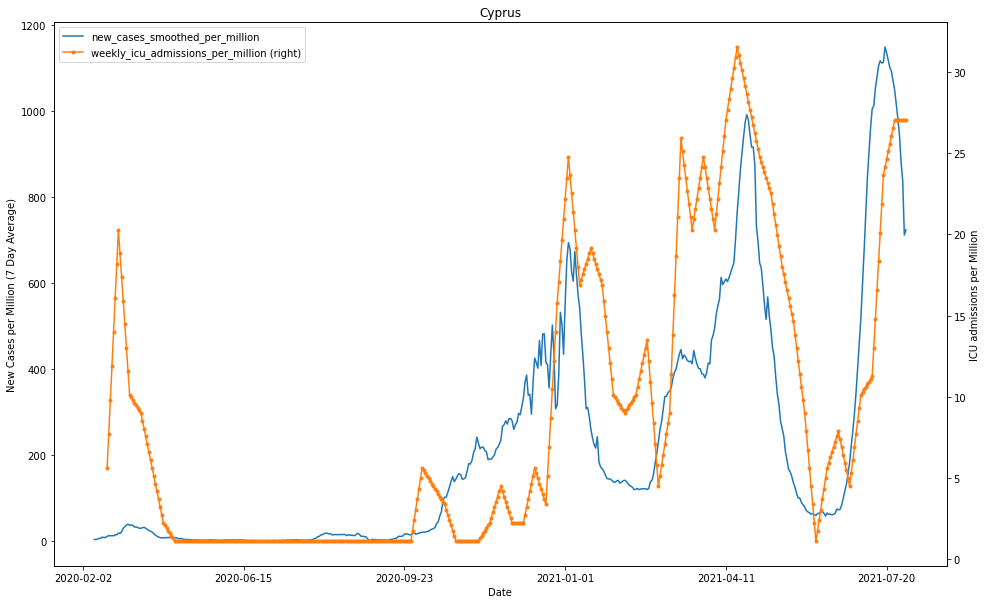

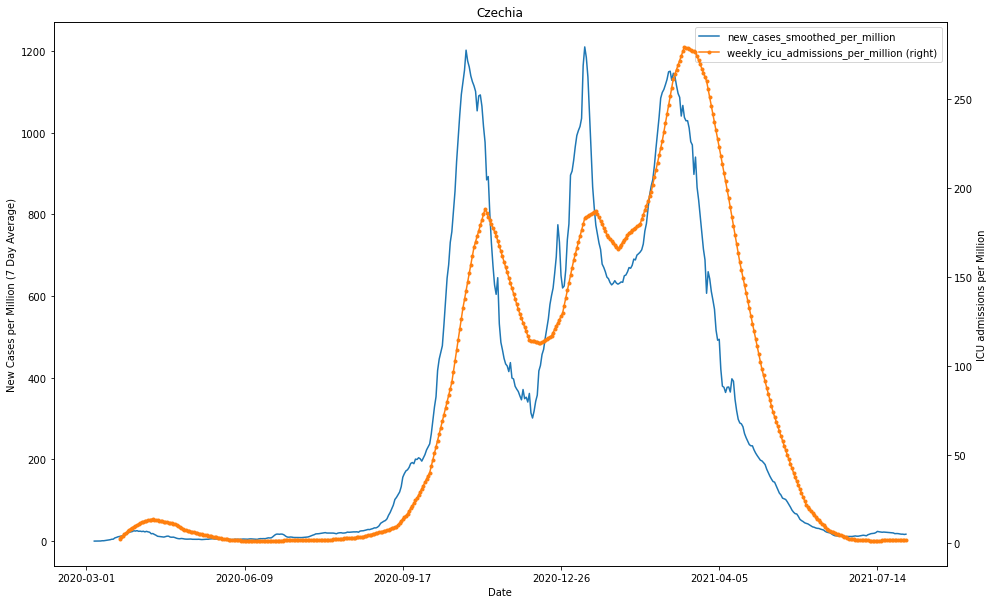

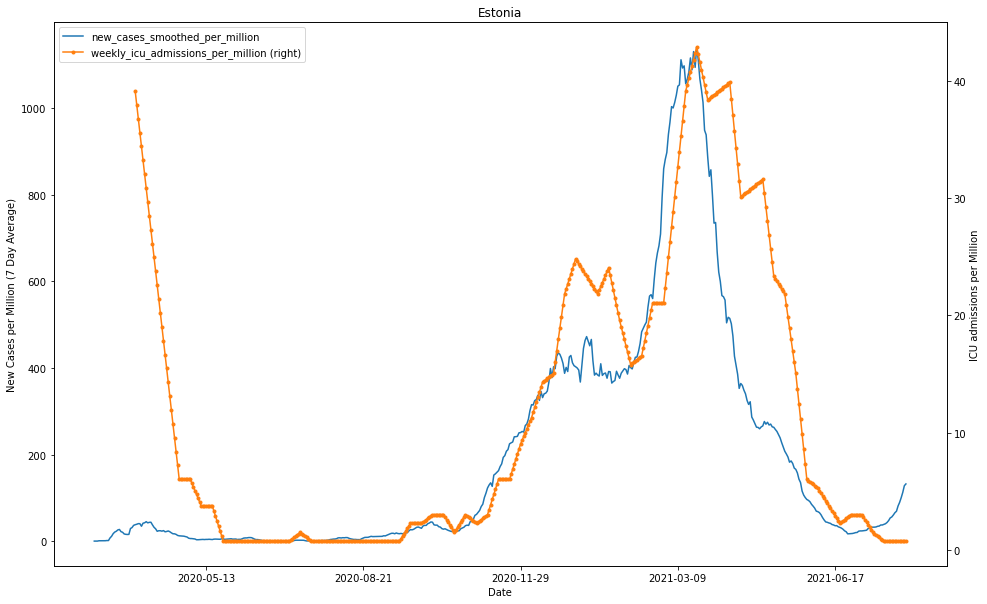

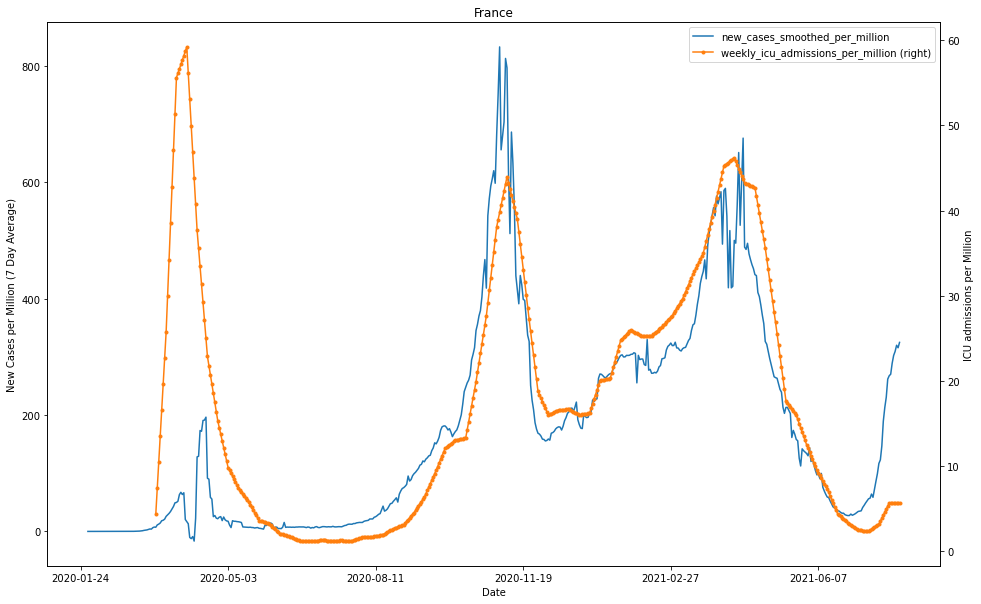

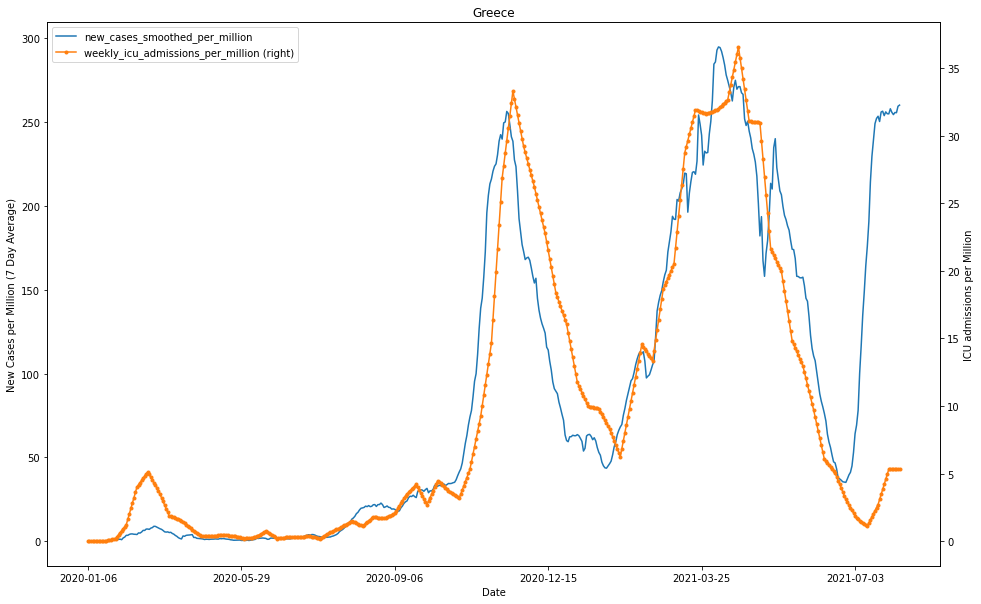

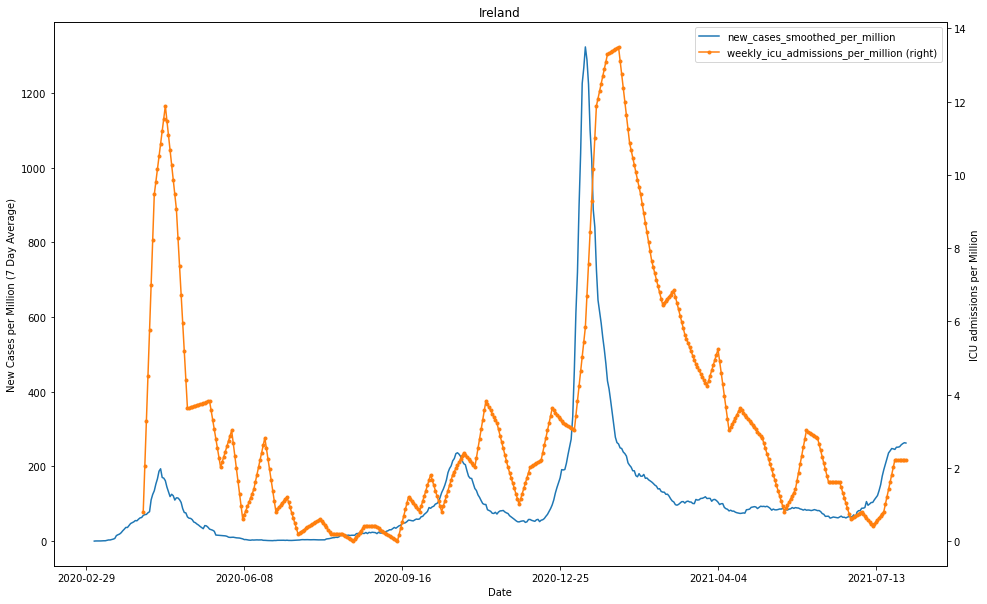

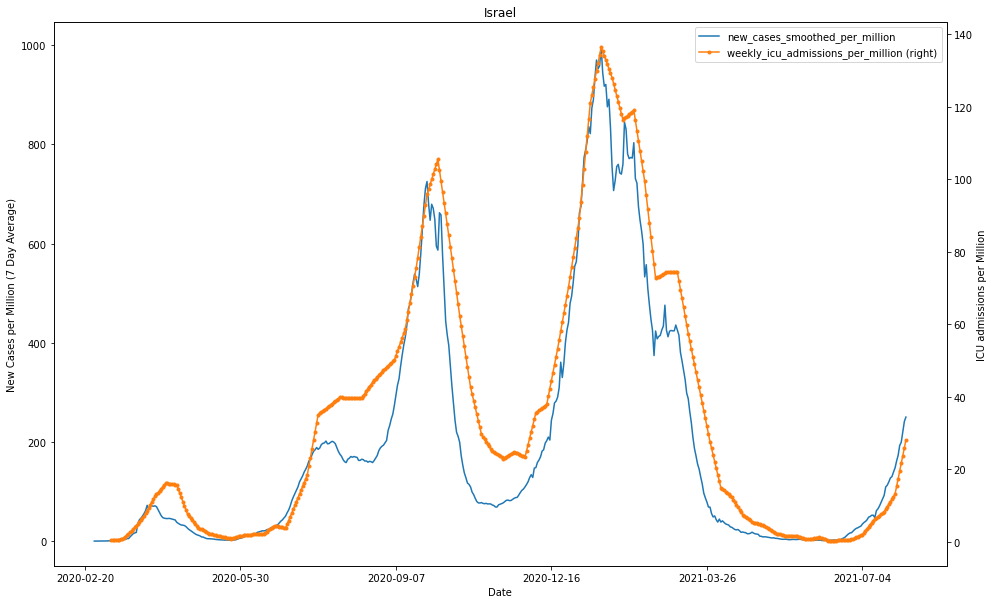

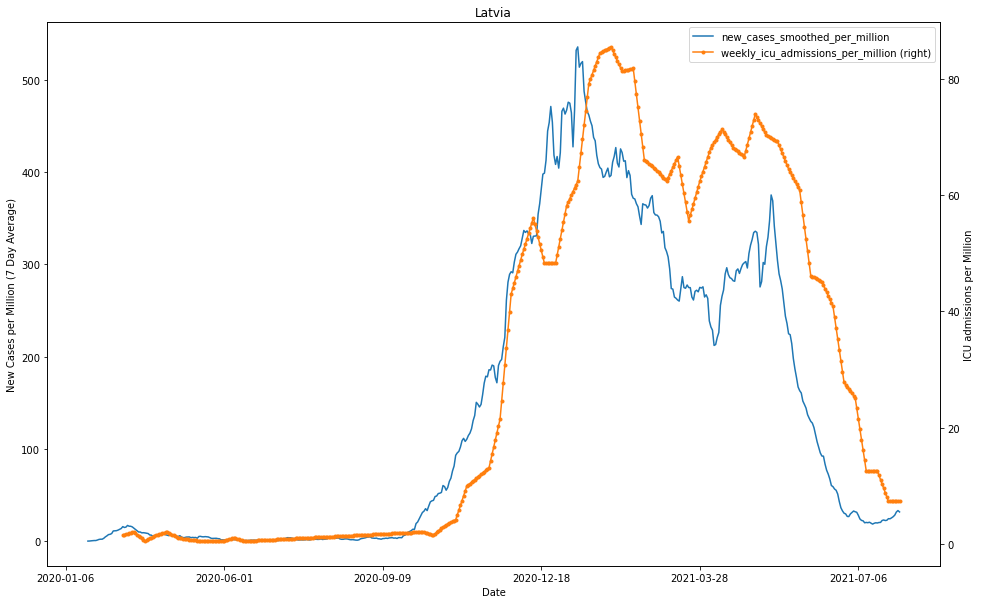

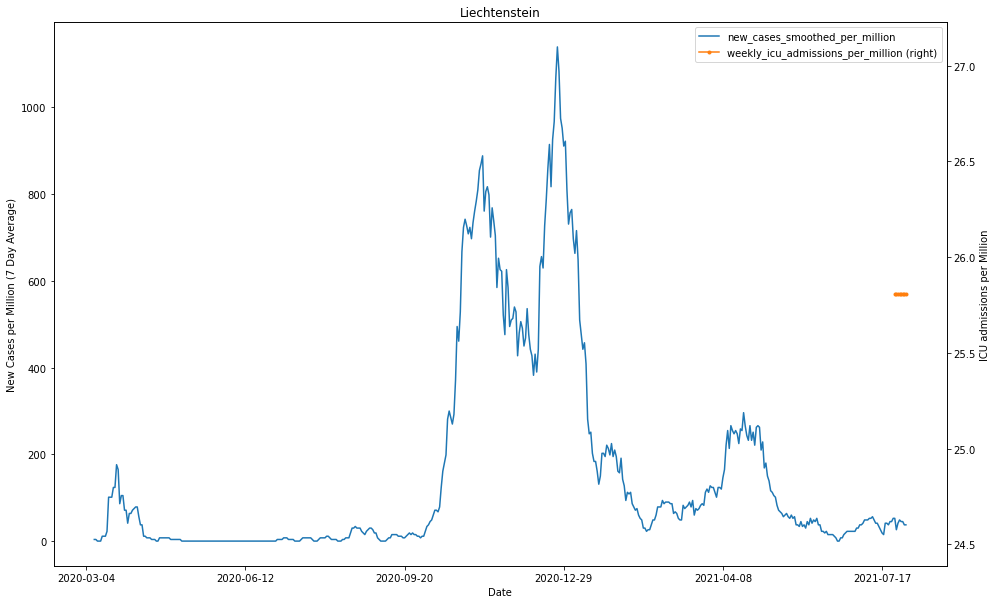

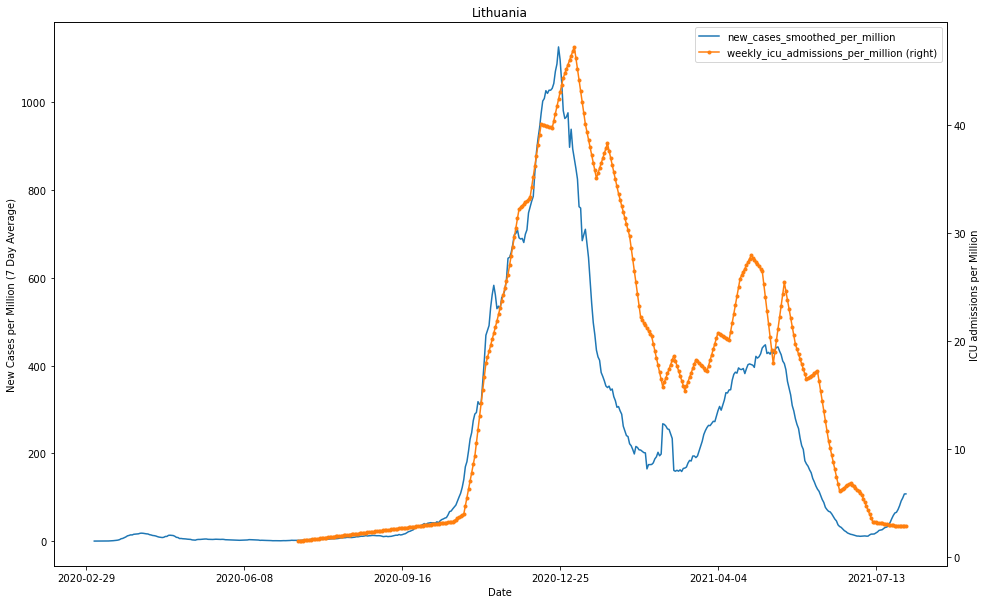

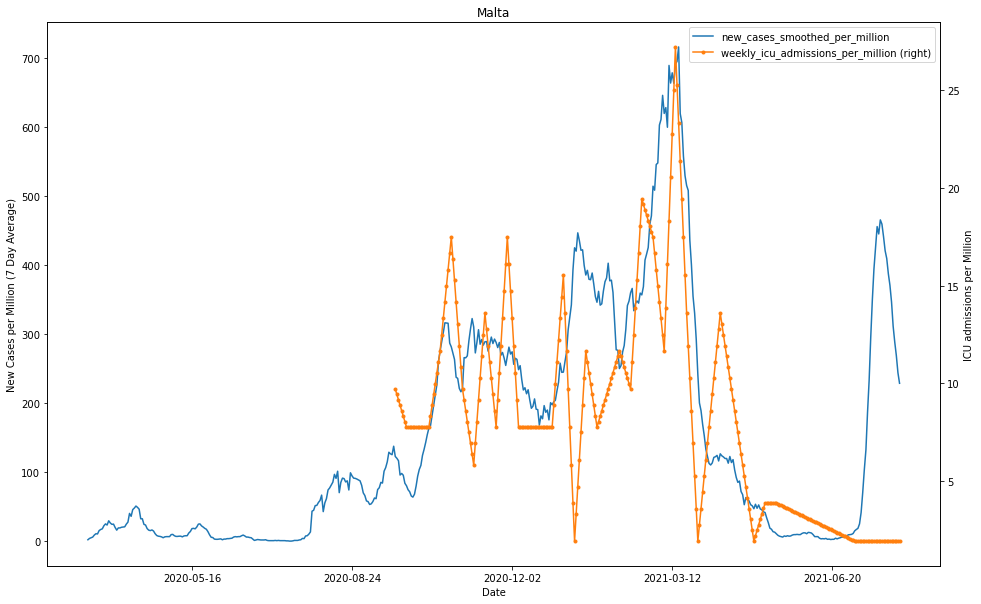

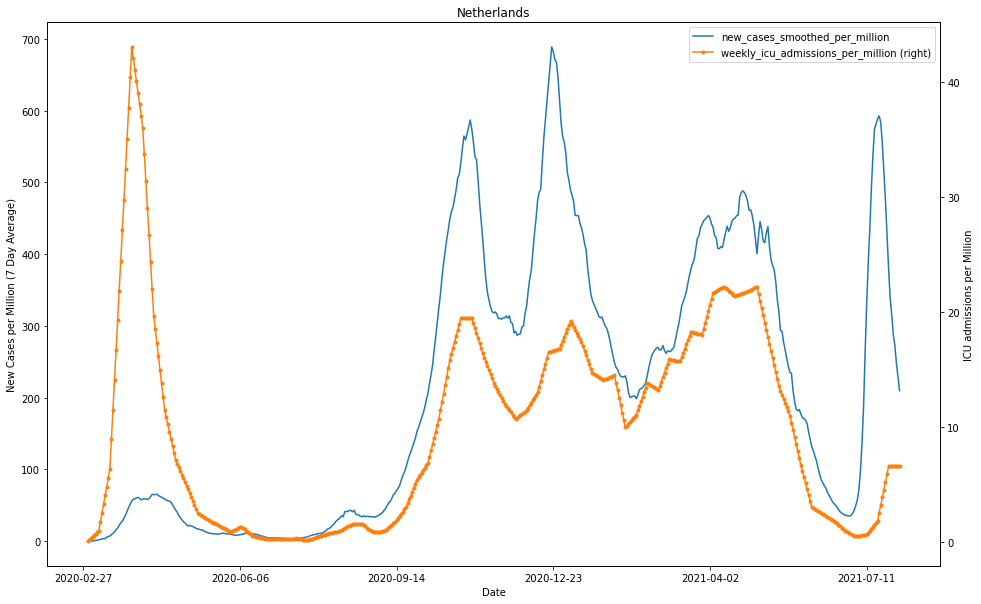

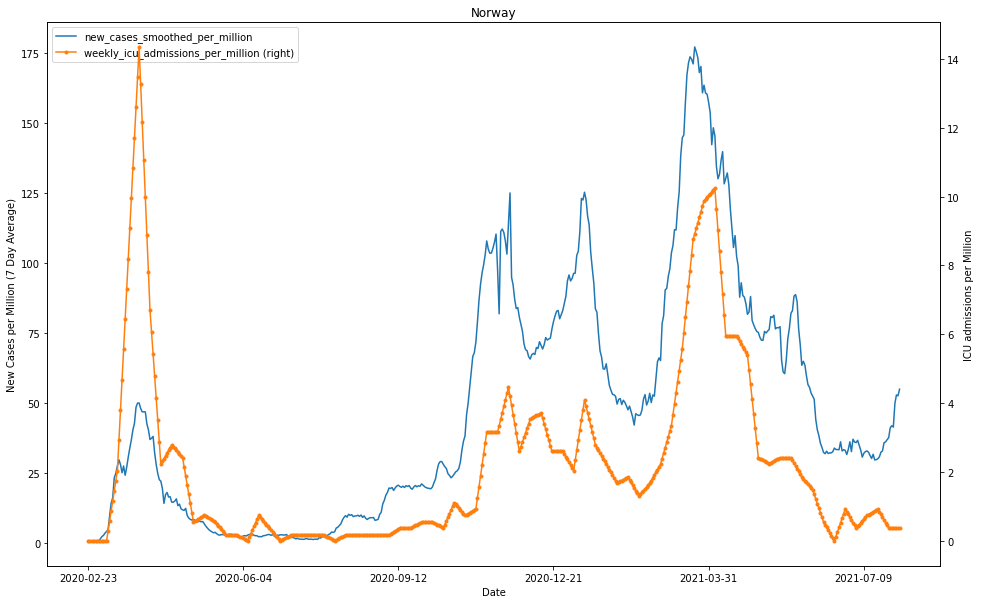

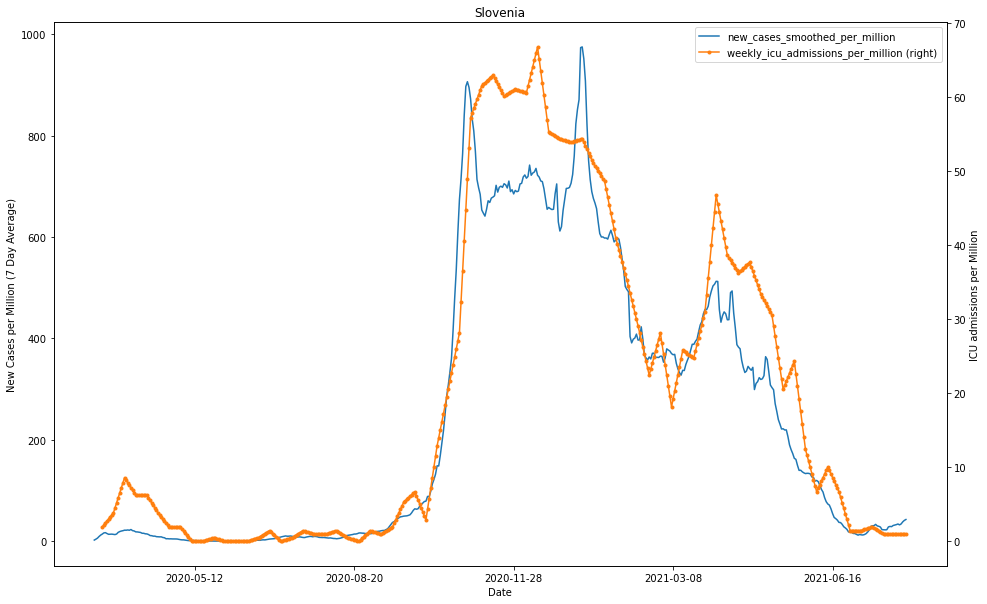

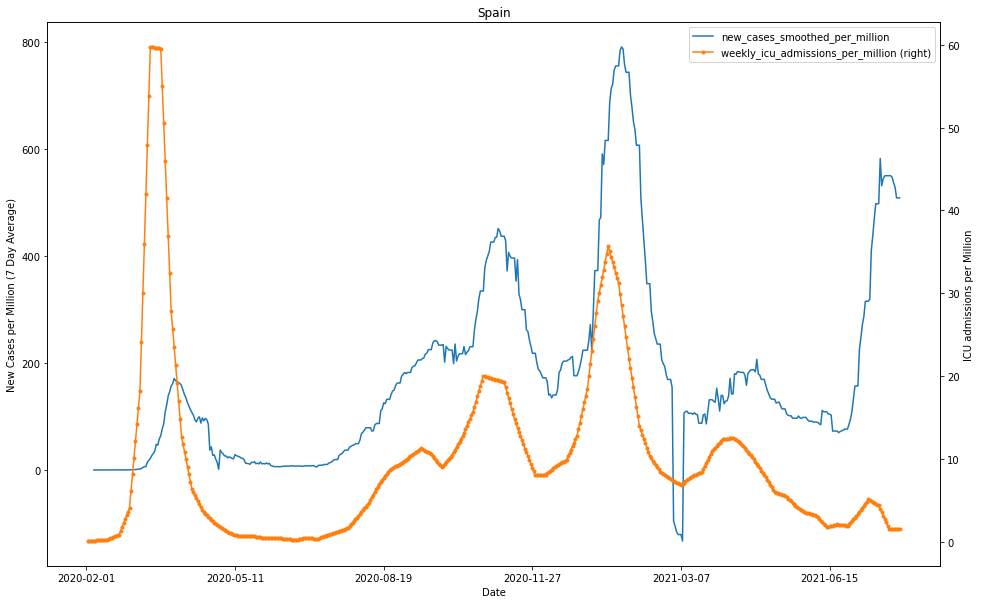

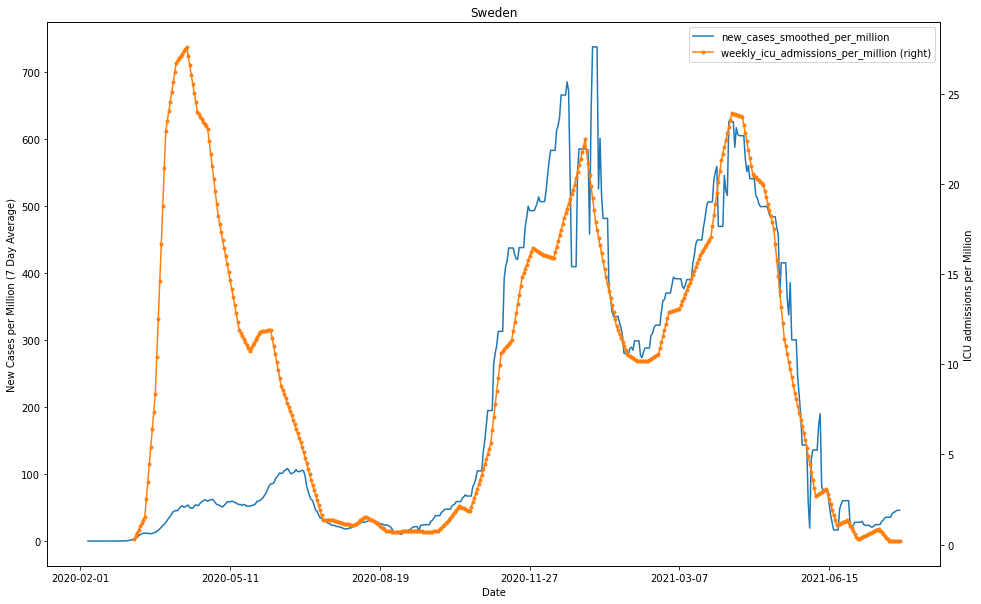

In [118]:
# Plot ICU admissions and smoothed case numbers for these countries
! mkdir fig/icu_admissions

for country in icu_admissions_countries:
    df = cases_icu_grouped.get_group(country)
    # interpolate weekly ICU admission linearly
    df.interpolate(method='linear', inplace=True)

    fig = plt.figure(figsize=(16, 10))
    cax = plt.gca()
    
    df.plot(x='date', y='new_cases_smoothed_per_million', kind='line', 
                  ylabel='New Cases per Million (7 Day Average)', ax=cax)
    df.plot(x='date', y='weekly_icu_admissions_per_million', kind='line', ax=cax,
            secondary_y=True, linestyle='solid', marker='.')
    cax.right_ax.set_ylabel('ICU admissions per Million')
    cax.set_xlabel('Date')
    cax.set_title(str(df['location'].unique()[0]))

    fig.savefig('fig/icu_admissions/icu_admissions_' + country + '.pdf')

<b> Conclusions from Plots </b> (s. annotated pdf icu_and_cases_all_countries.pdf)

1. Case Numbers do not (always) reflect the pandemic severity in terms of ICU admissions.
2. Low Testing - as in the beginning of the pandemic - results in low case numbers despite many ICU admissions. Consequently, coupling policies only to case numbers can result in exhausted ICU capcaities for low test per case ratio.
3. High Testing (Greece and Malta right now) results in high Case Numbers although ICU admission rates are low. Thus, strict policies might not be justifiable.
4.Some anomalies not predictable from testing strategy (Malta around April 11, Ireland in June). Causes to be found e.g. Shift in Variant Shares.

<b> TODO: </b> 

1. Look at ICU patients  vs. Case Numbers
2. Stringency Index?
3. Assess relationship between Deaths and ICU patients. Can we observe disproportionately high Death rates for maxed out ICUs? Stringency Index?


<ipython-input-8-fe70c1164a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-8-fe70c1164a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-8-fe70c1164a30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.interpolate(method='linear', inplace=True)
<ipython-input-8-fe70c1164a30>:5: SettingWithCopyWarning: 
A 

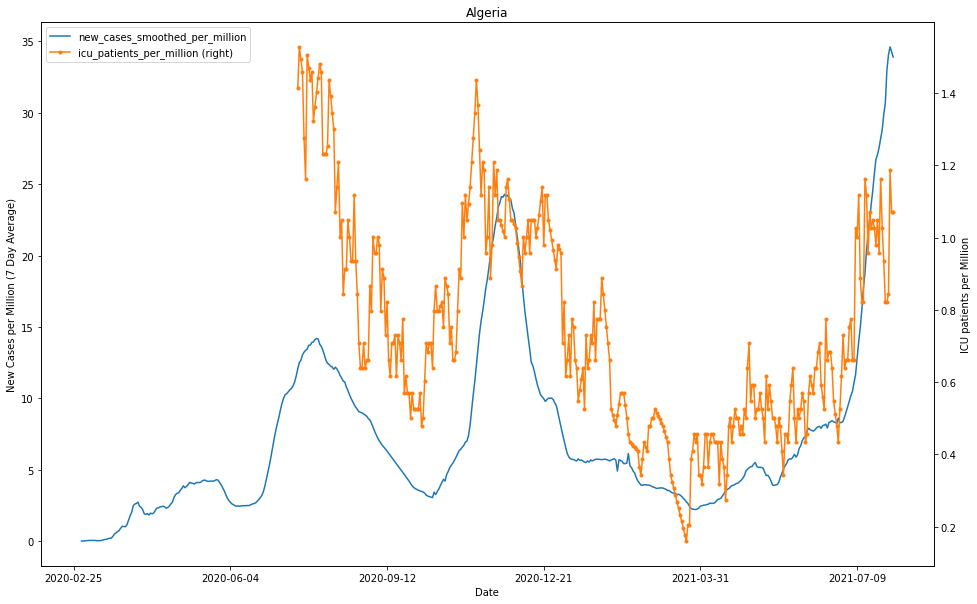

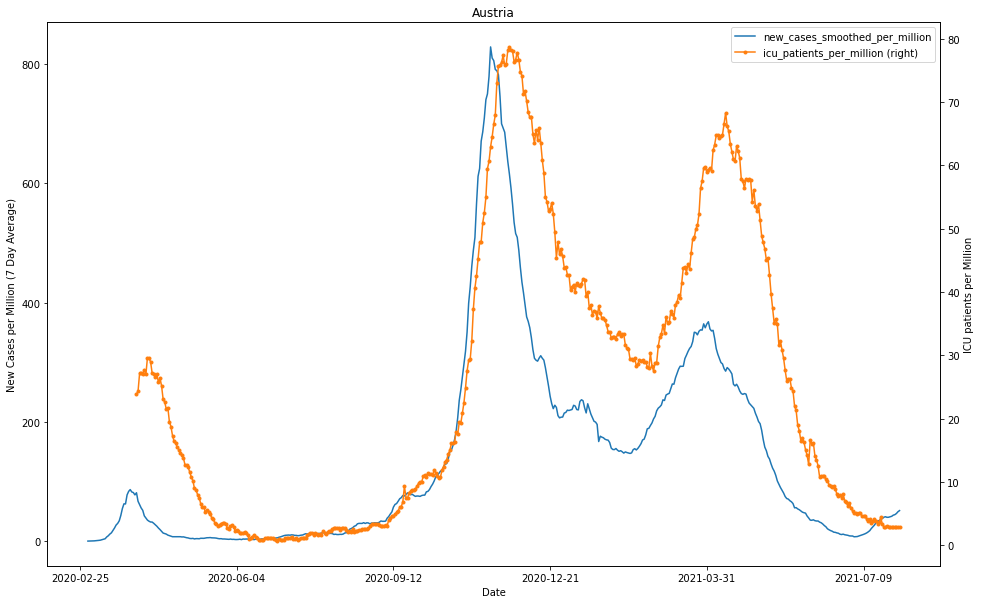

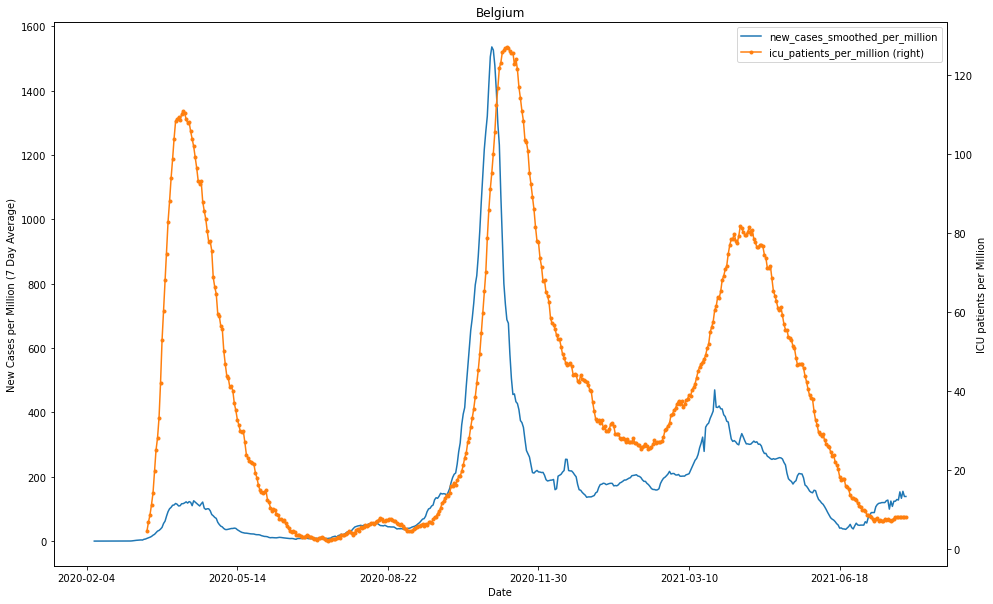

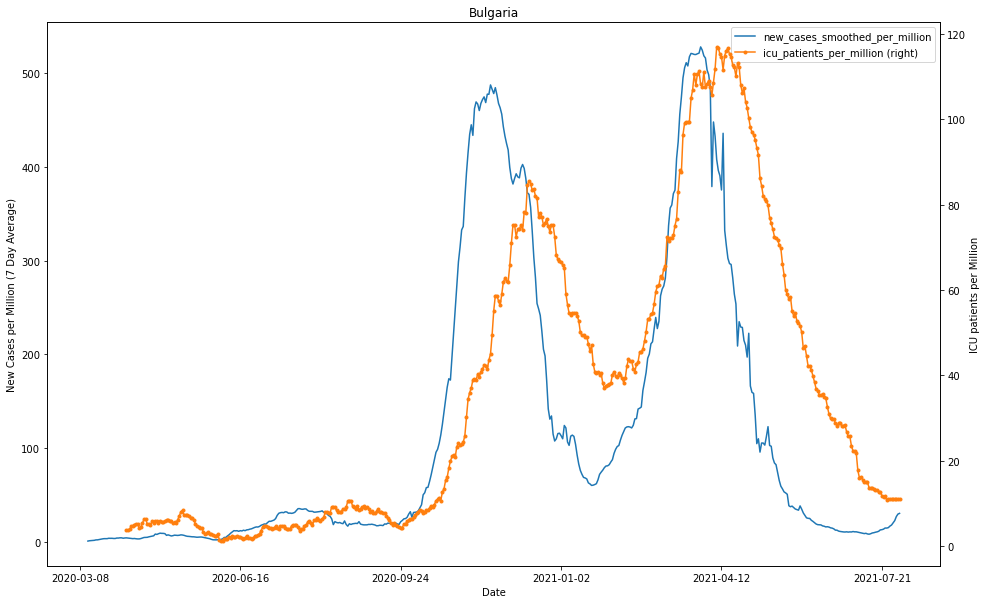

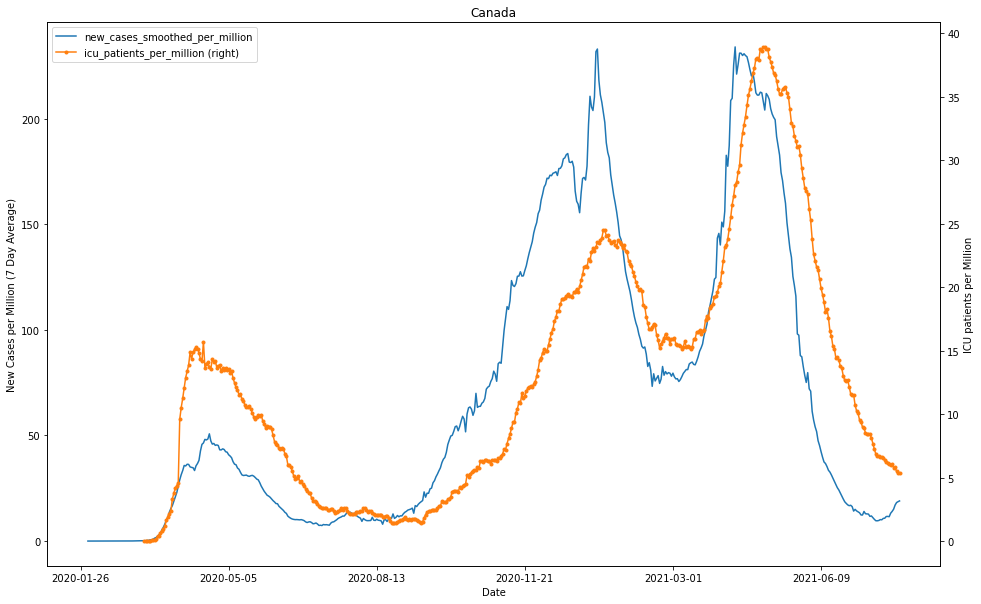

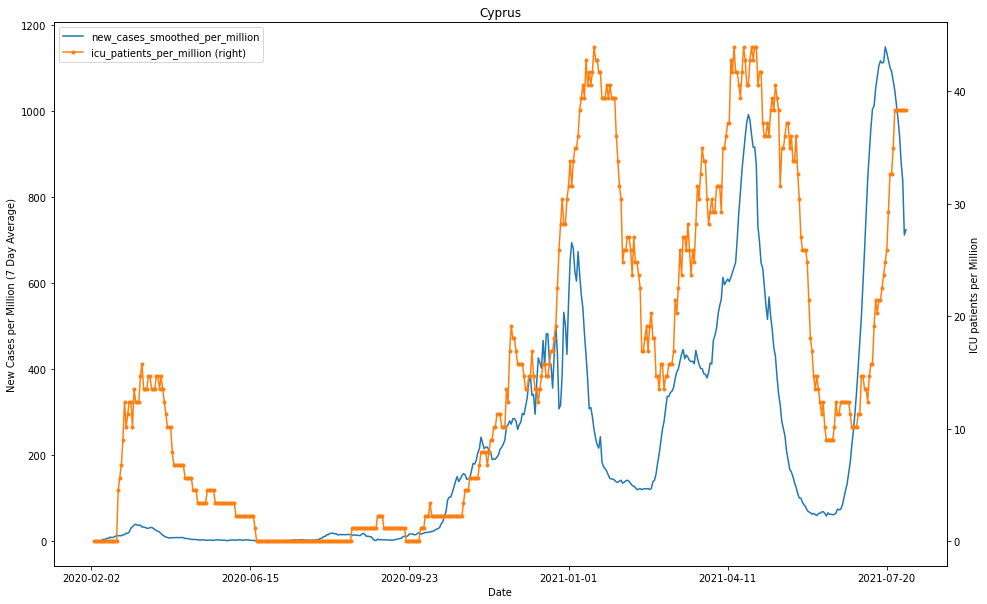

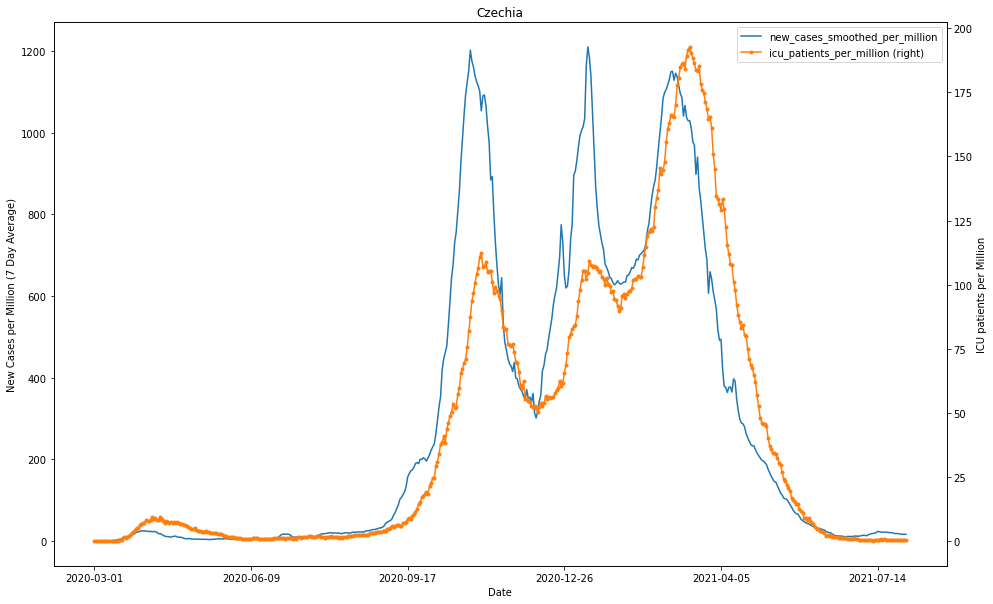

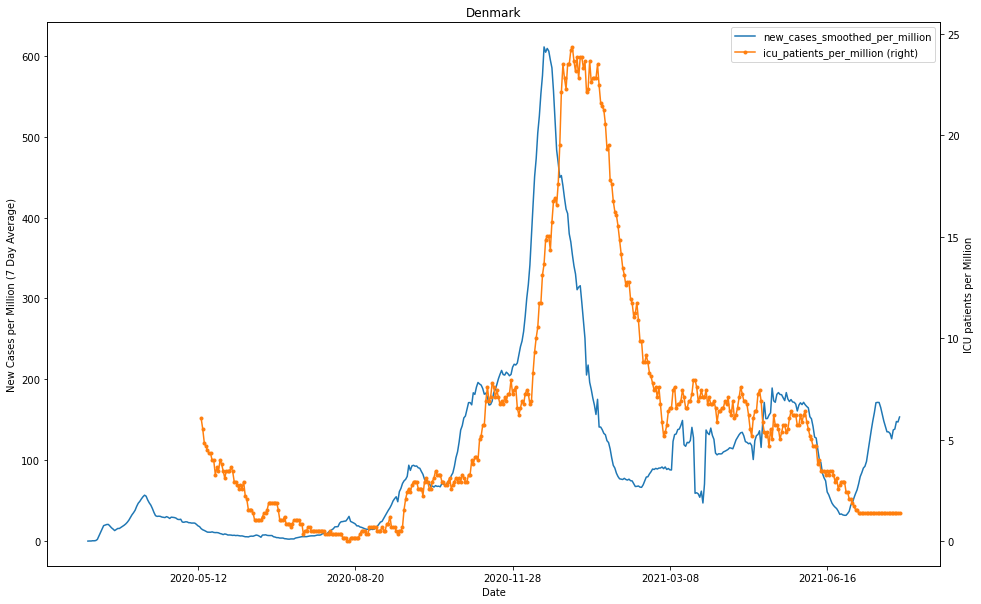

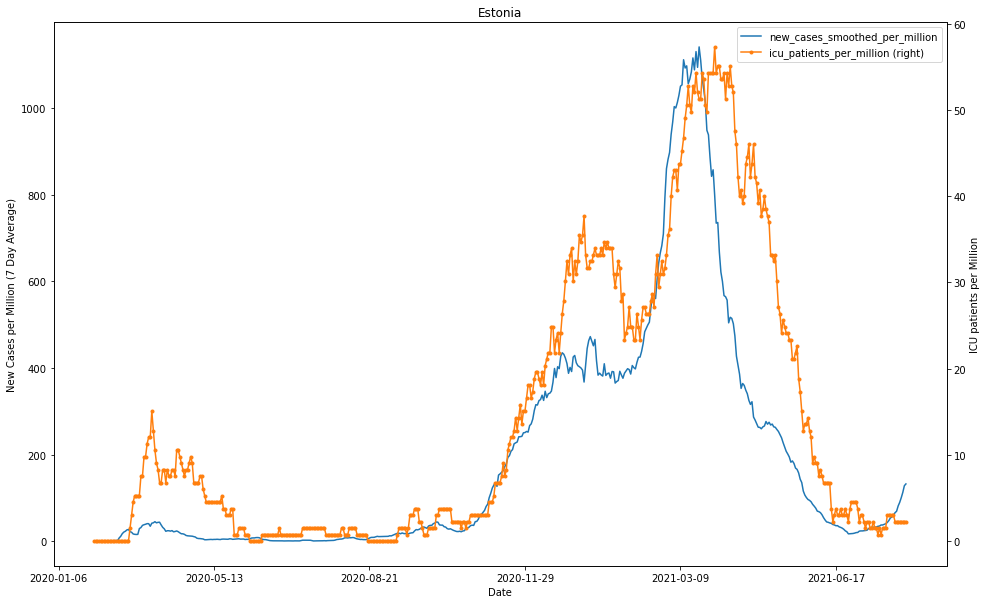

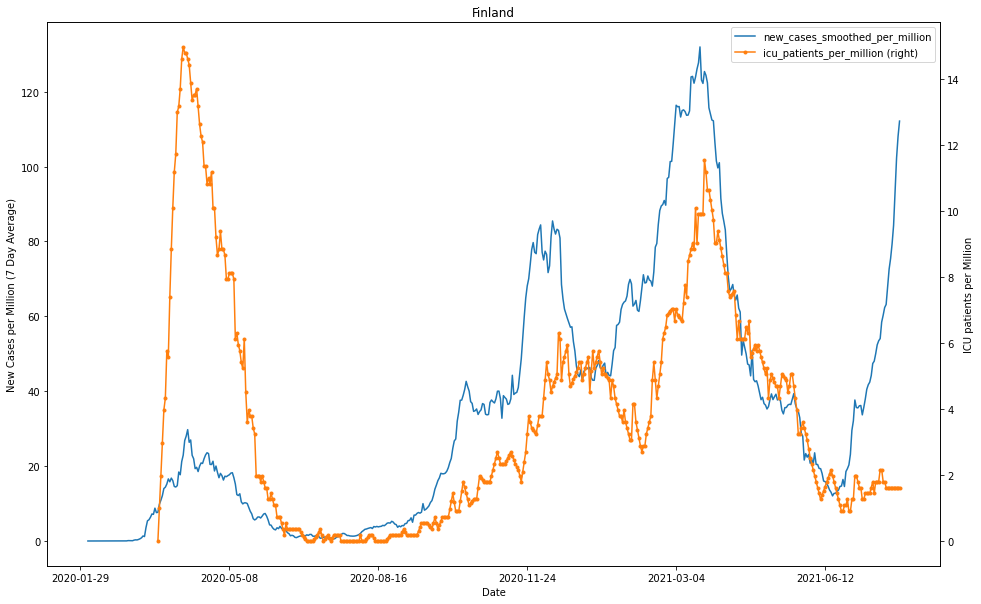

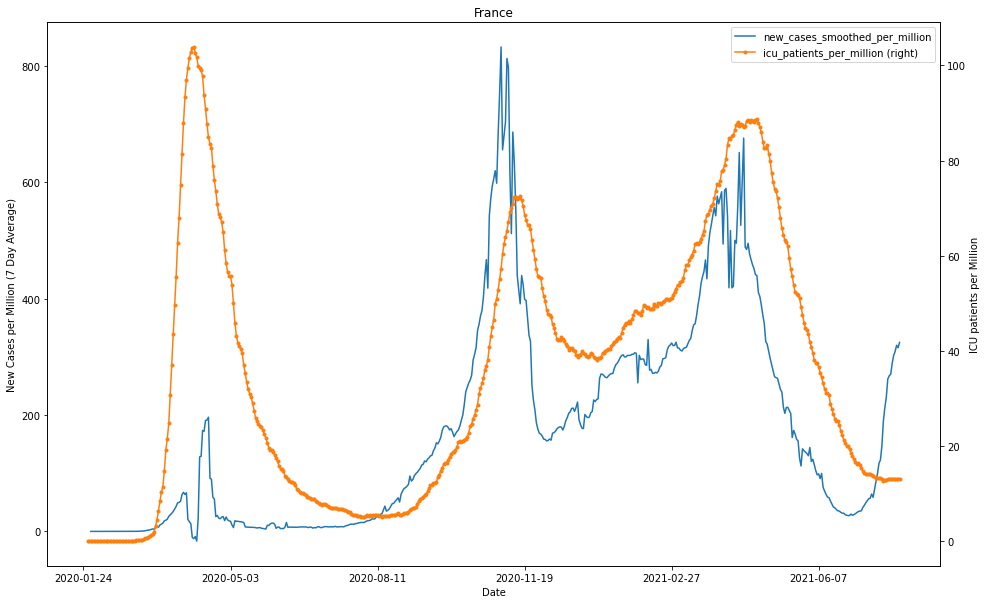

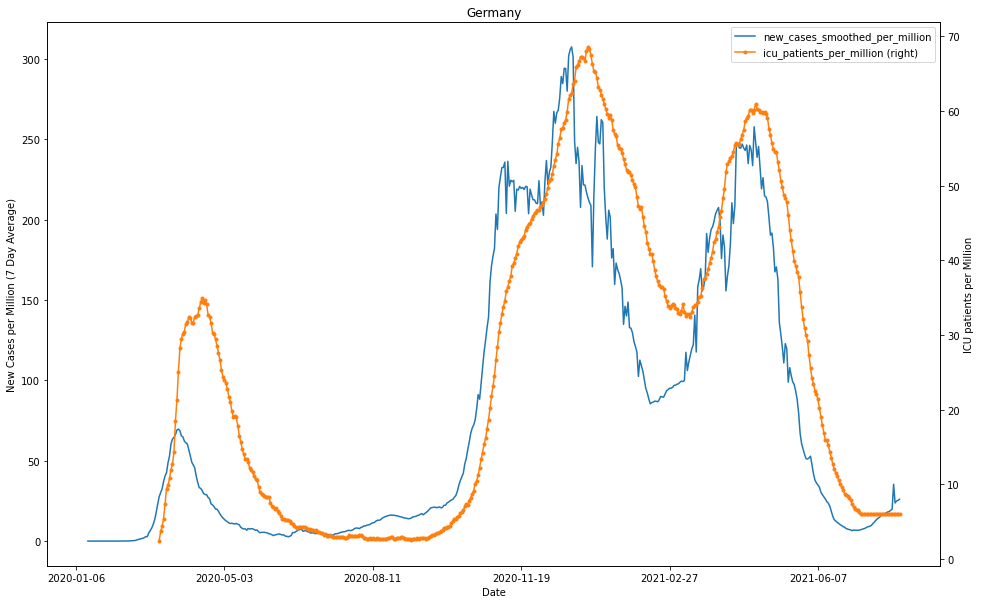

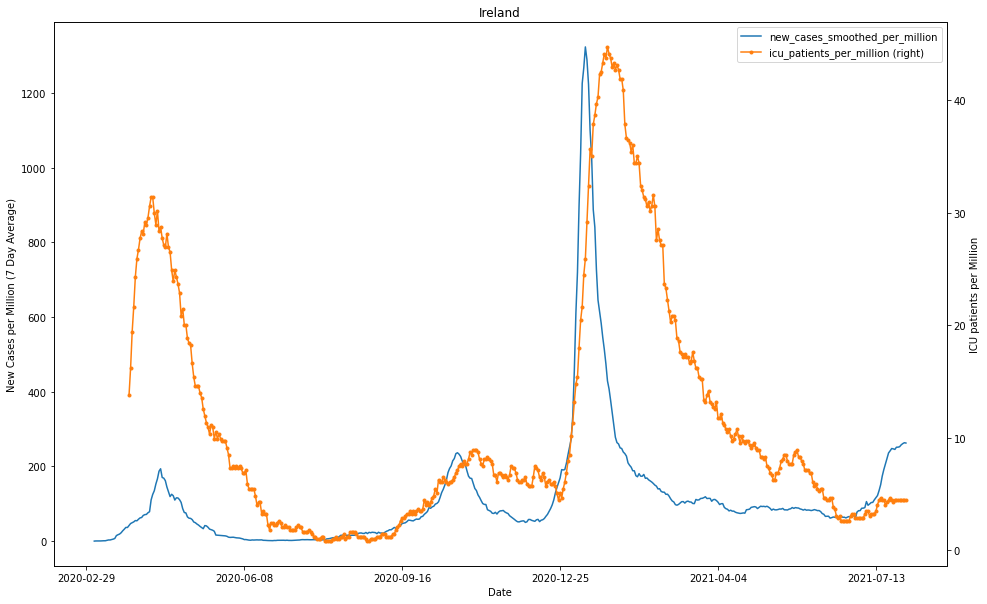

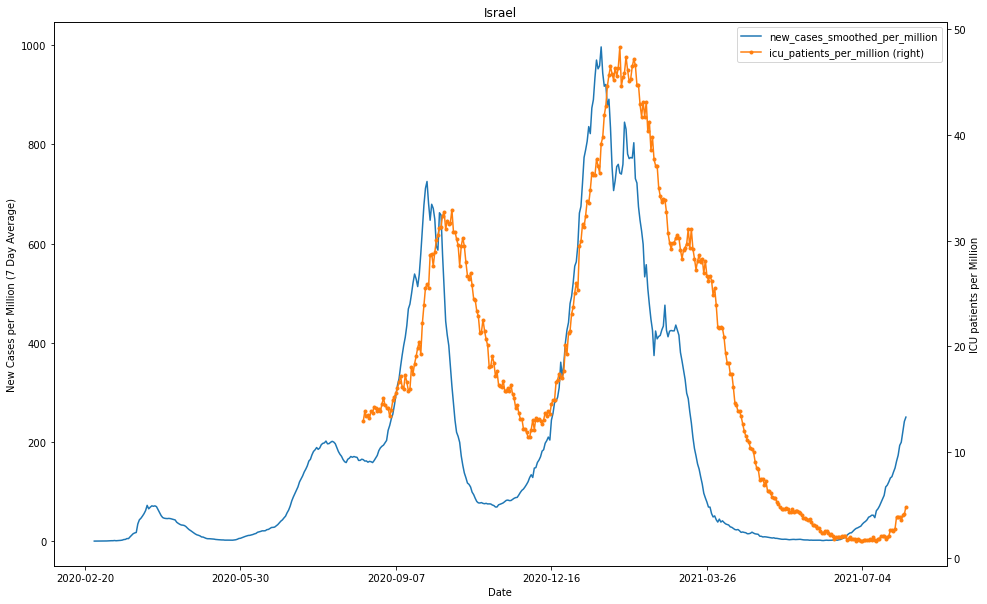

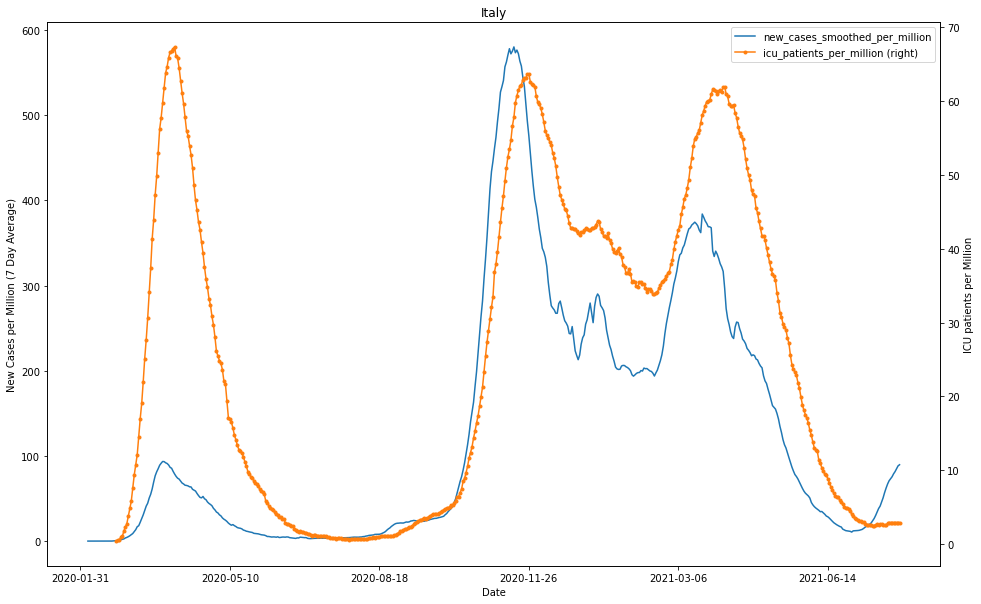

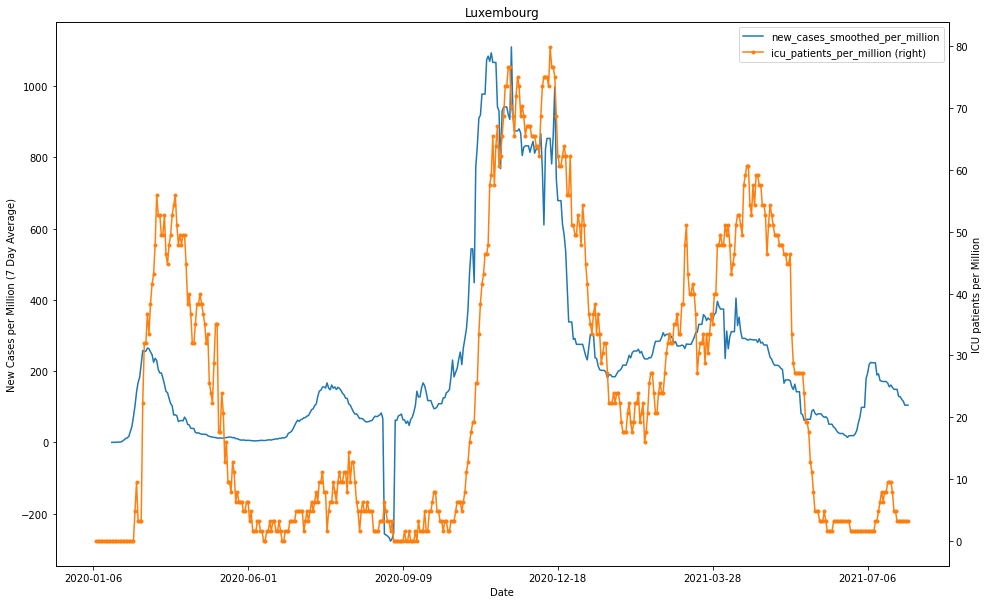

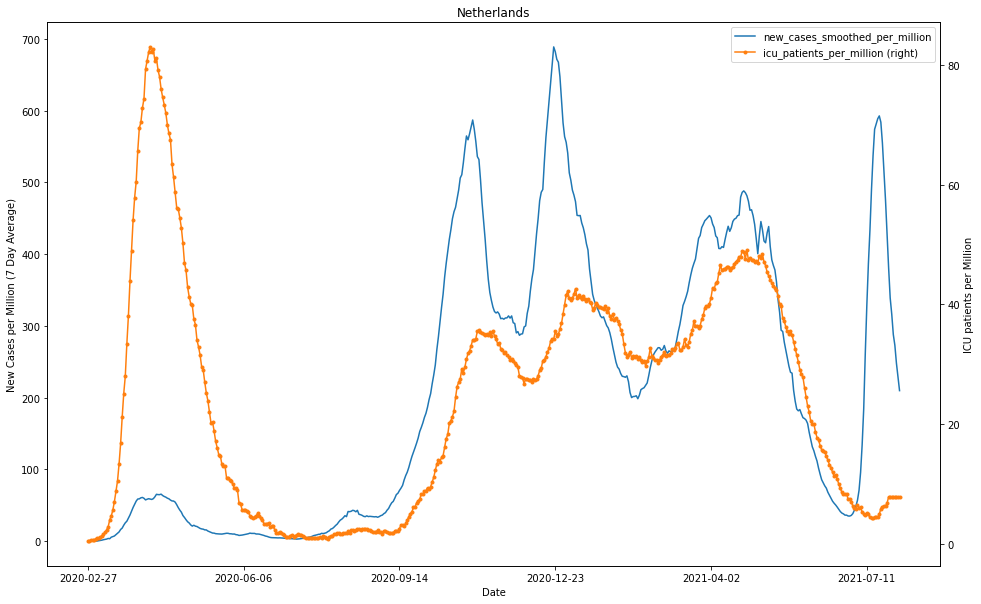

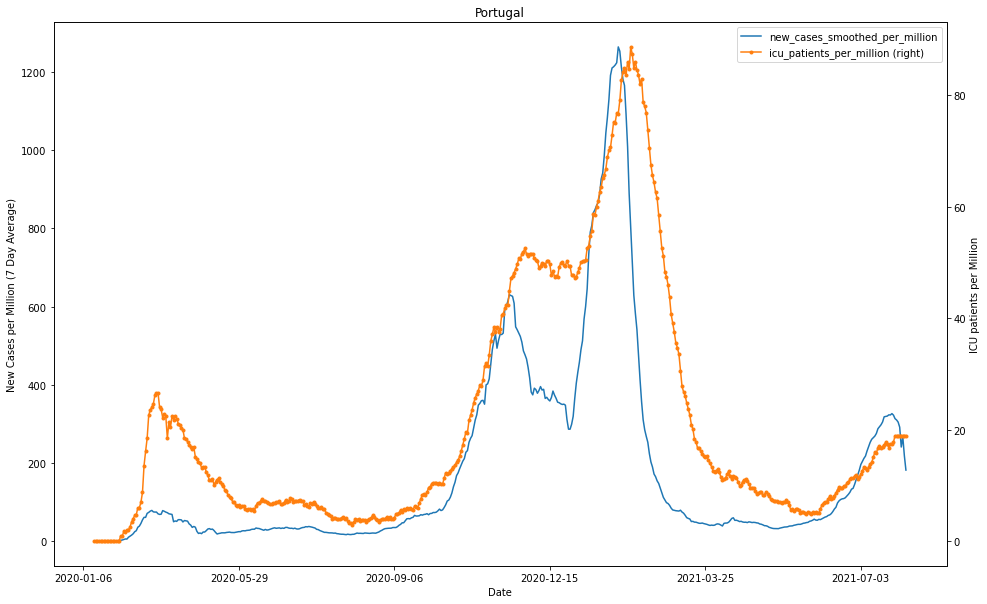

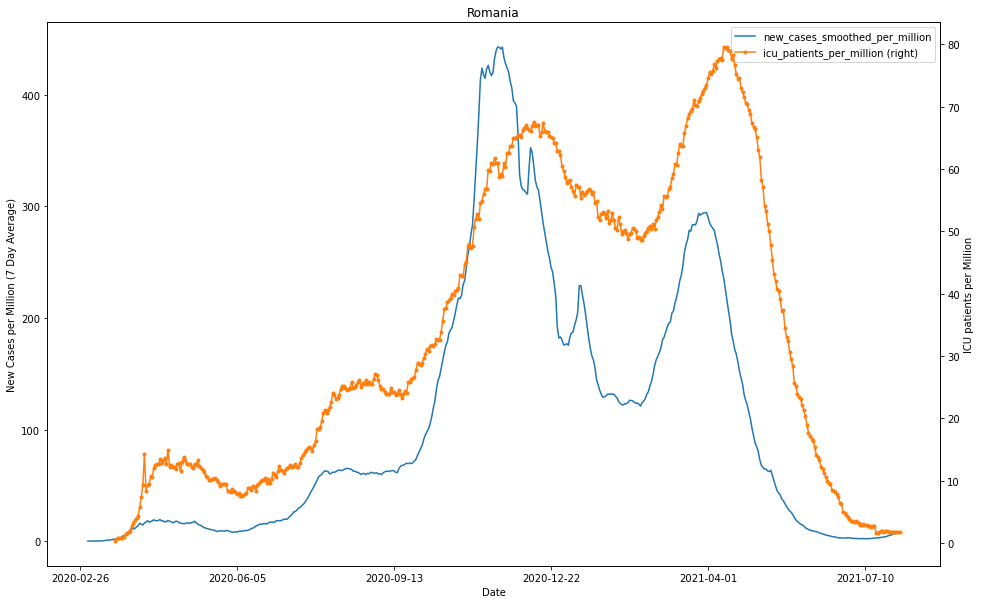

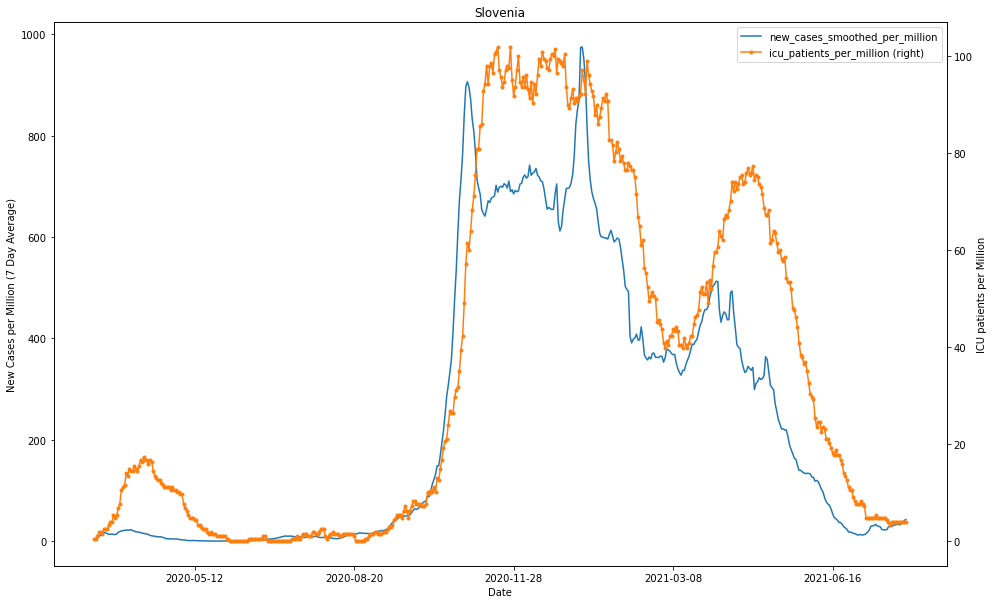

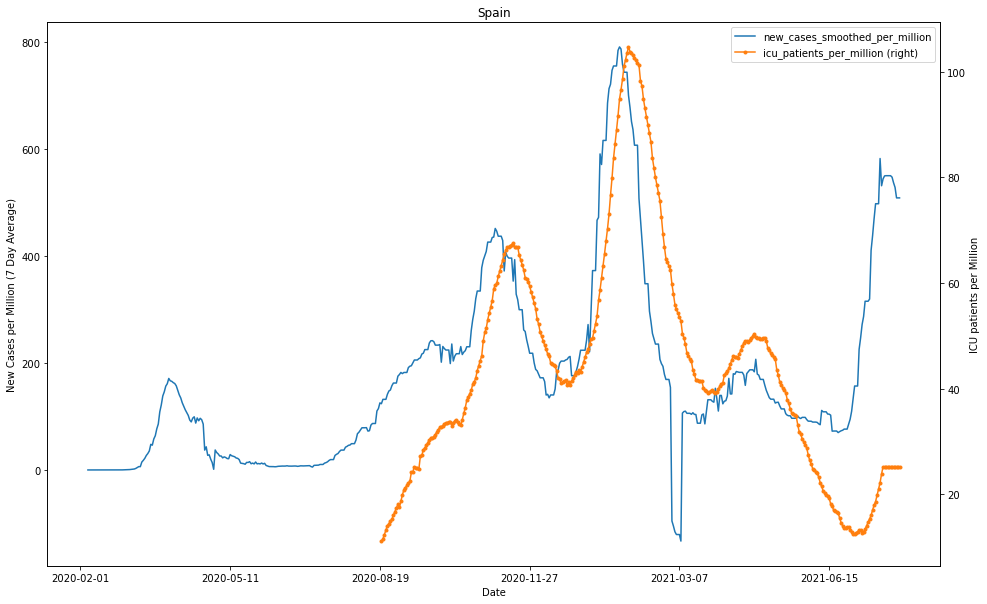

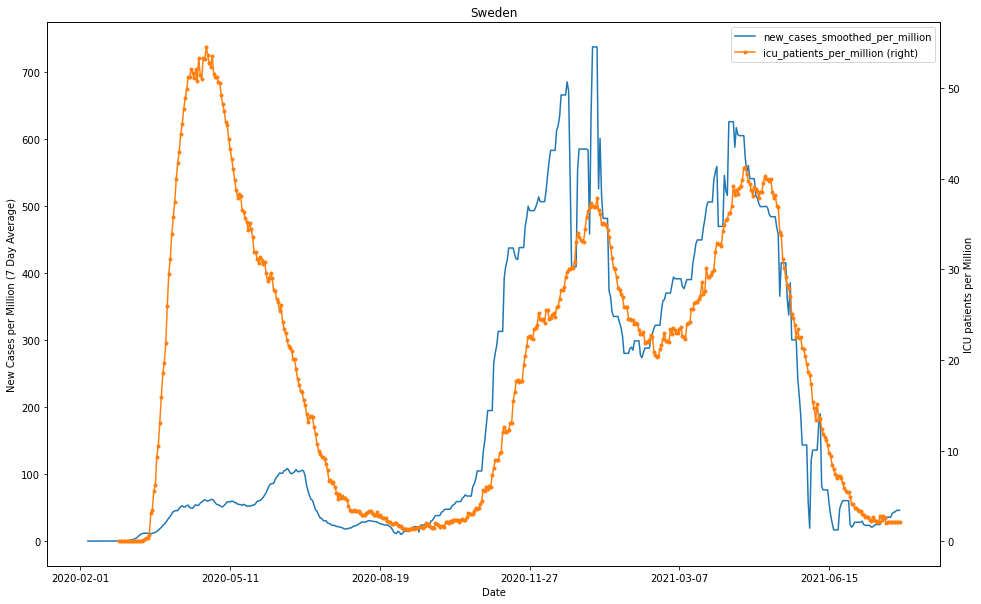

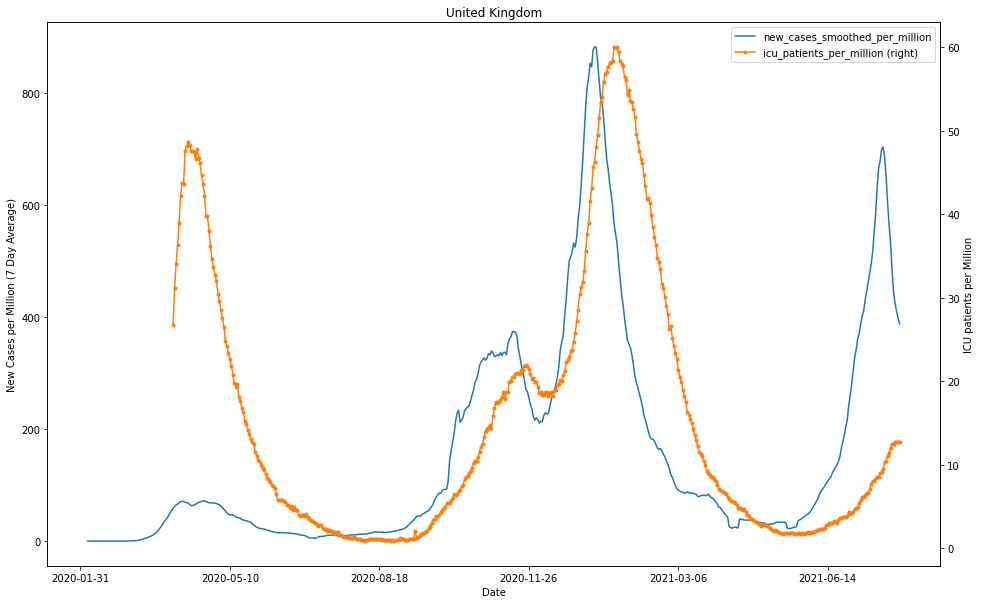

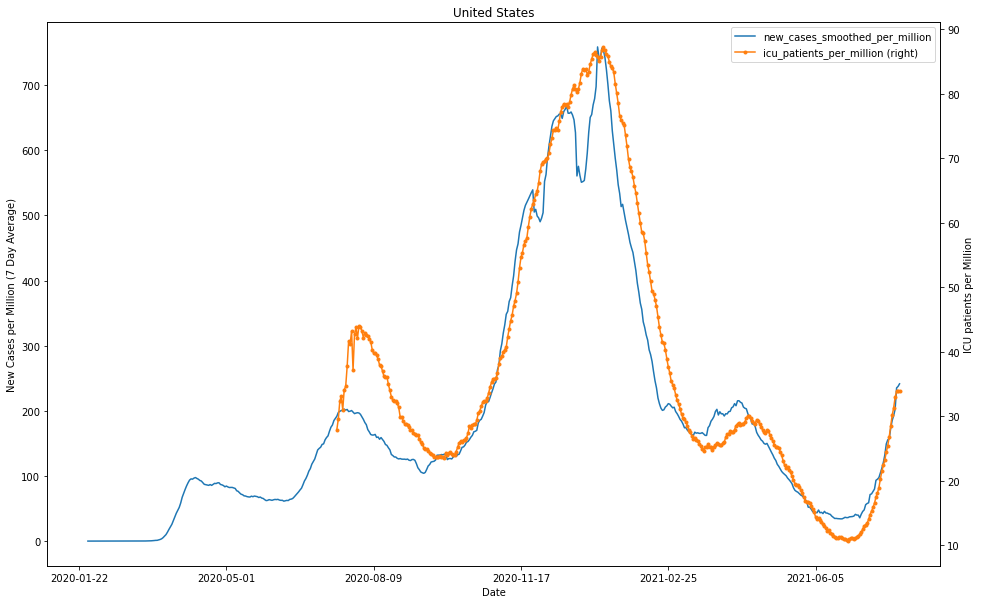

In [8]:
# Plot ICU admissions and smoothed case numbers for these countries
!mkdir fig/icu_occupancy

for country in icu_countries:
    df = cases_icu_grouped.get_group(country)
    # interpolate weekly ICU admission linearly
    df.interpolate(method='linear', inplace=True)

    fig = plt.figure(figsize=(16, 10))
    cax = plt.gca()
    
    df.plot(x='date', y='new_cases_smoothed_per_million', kind='line', 
                  ylabel='New Cases per Million (7 Day Average)', ax=cax)
    df.plot(x='date', y='icu_patients_per_million', kind='line', ax=cax,
            secondary_y=True, linestyle='solid', marker='.')
    cax.right_ax.set_ylabel('ICU patients per Million')
    cax.set_xlabel('Date')
    cax.set_title(str(df['location'].unique()[0]))

    fig.savefig('fig/icu_occupancy/icu_occupancy_' + country + '.pdf')

<b> Conclusion from Plots </b> (s. annotated pdf icu_occupancy_and_cases_all_countries.pdf)

Equal Case Numbers do not imply equal ICU occupancy.
After a wave, case numbers drop faster than the ICU occupancy.
Loosening Lockdown measures below a certain threshold of cases can then cause overloading of ICUs during the next wave of infections, since the ICUs are still partially filled with patients from the first wave.

look at stringency index and deaths in italy!

## Developing a more expressive metric for guidance of lockdown measures

Thoughts on Pandemic Severity Measure: Take into account positivity rate, TpC, ... with exp decay? and current ICU occupancy

<u> Method for Evaluation </u>:

<b> Premise: </b> Metric shall not be too complex in order to communicate properly to the general public why measures are taken.
Thus we do not aim at developing the most predictive metric, but one that is intuitive to communicate, accounts for the current ICU occupancy and considers testing behaviour to counteract the aforementioned illusions of Case Numbers.

<b> Consequence: </b>
Fit one dimensional linear regression of ICU occupancy onto Pandemic Severity Metric (PSM) and compare $R^2$ to case Numbers.

$\rightarrow$ Figure Out technical details. Time Shift for x? Fit Models on Sliding Window? Go from High Level Perspective downwards: How are Policies guided right now?

    Meeting Notes:

    Timo's next steps: 
(1) Compare Testing Strategies
$\rightarrow$ Compare lockdown measures of countries with similar testing strategies but significantly different death rates.
    
(2)  Evaluate Relevance of Testing efforts with increasing vaccination rates. Is it necessary/ does it make sense to test much even with high vaccination rates.